In [1]:
import requests as rq
import json
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re, os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import konlpy
import bs4
import tweepy
import openpyxl
import sys
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from PIL import Image
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
#!pip uninstall tweepy
#!pip install tweepy==3.10.0
#!pip install konlpy
#!pip install opencv-python
#!pip install pytesseract
#!pip install pyautogui                         # Pillow 패키지의 영상 핸들링 클래스.
%matplotlib inline

In [ ]:
# 크롬 드라이버 로딩.
my_service = Service("chromedriver.exe")
my_driver = webdriver.Chrome(service=my_service)

In [ ]:
def get_titles(my_soup):
    my_ul=my_soup.find('ul', class_='list_news')
    my_titles=my_ul.select('a.news_tit')
    my_titles_list=[x.text.strip() for x in my_titles]
    print(my_titles_list)
    return pd.DataFrame(my_titles_list)

In [ ]:
# 사이트에 접속.
my_url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EB%B6%80%EC%8B%A4%EA%B3%B5%EC%82%AC&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=48&mynews=0&office_type=0&office_section_code=0&news_office_checked=&office_category=0&service_area=0&nso=so:r,p:all,a:all&start="
for i in range(1,11):
    i= 10*i-9
    my_driver.get(my_url + str(i))
    my_html = my_driver.page_source
    soup = bs4.BeautifulSoup(my_html, 'html.parser')     
    if i == 1:
        df = get_titles(soup)
    else:
        df = pd.concat([df, get_titles(soup)],axis=0,ignore_index=True)

In [ ]:
df.to_csv(r'..\jhfolder\bgproject\bg_keywords.csv', encoding='cp949', index=False)

In [ ]:
my_wb = openpyxl.Workbook()           # 메모리 안에서만 존재.
print(my_wb.sheetnames)

In [ ]:
my_sh = my_wb['Sheet']

In [ ]:
dfe=pd.read_excel(r'..\jhfolder\bgproject\찐업체벌점.xlsx')

In [ ]:
dfe

In [ ]:
dfe.drop(labels=['업무영역','법인등록번호','부과기관/벌점부과번호/현장벌점','반기벌점'],axis=1, inplace=True)
dfe

In [ ]:
dfe=dfe.rename(columns={'Unnamed: 5':'벌점부과번호','Unnamed: 6':'현장벌점'})

In [ ]:
dfe

In [ ]:
df2 = dfe.groupby('업체명')[['현장벌점']].sum()
#합산벌점도 한번에 넣어 합을 나타낼 수 있었지만 합산벌점은 평균으로 계산해야 하기 때문

In [ ]:
dfp=df2.sort_values(by='현장벌점',ascending=False)

In [ ]:
dfp

In [ ]:
df3 = dfe.groupby('업체명')[['합산벌점']].mean(numeric_only=True)

In [ ]:
df3

In [ ]:
dfs=df3.sort_values(by='합산벌점',ascending=False)

In [ ]:
dfs

# dfp dfs끼리 랭킹 비교

In [ ]:
dfp[:10]

In [ ]:
dfs[:10]

In [ ]:
dfp.loc['화성산업(주)']

## 당기순이익 연도별 그래프

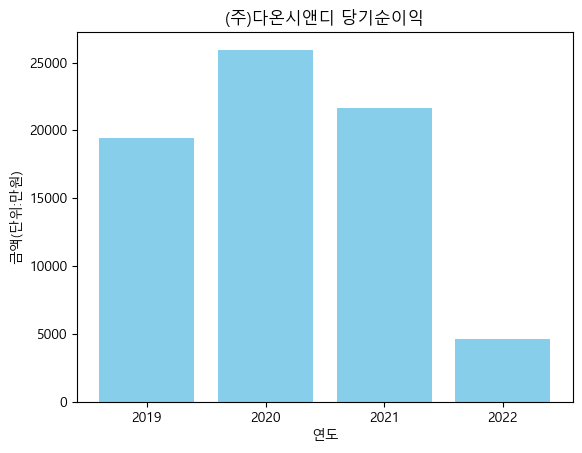

In [2]:
font_path='C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
x=['2019','2020','2021','2022']
y=[19451,25944,21635,4624]
plt.bar(x,y,color='skyblue')
plt.title('(주)다온시앤디 당기순이익')
plt.xlabel('연도')
plt.ylabel('금액(단위:만원)')
plt.show()

C:\Users\1104-12\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


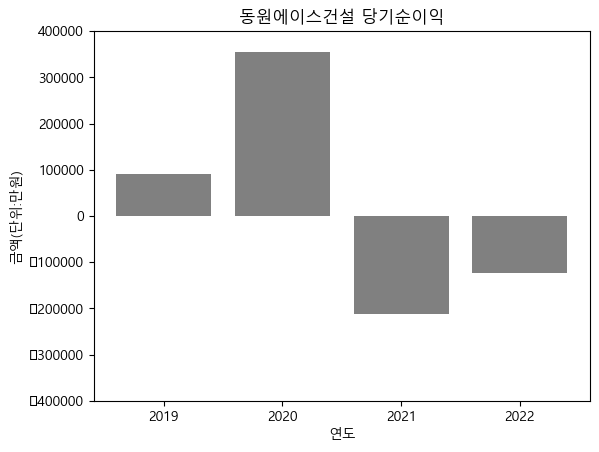

In [3]:
font_path='C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
x=['2019','2020','2021','2022']
y=[91726,355000,-212000,-123000]
plt.bar(x,y,color='grey')
plt.title('동원에이스건설 당기순이익')
plt.xlabel('연도')
plt.ylabel('금액(단위:만원)')
plt.ylim([-400000,400000])
plt.show()

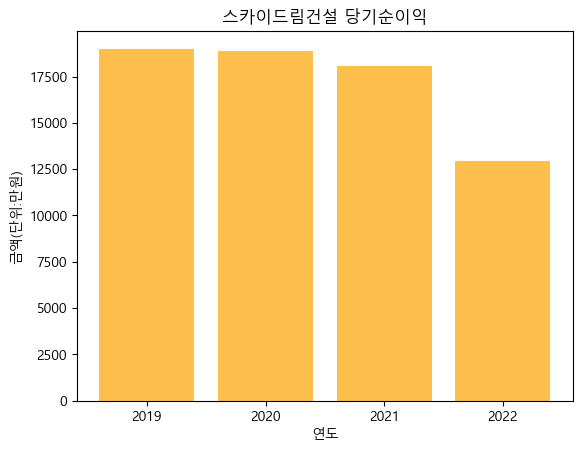

In [4]:
font_path='C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
x=['2019','2020','2021','2022']
y=[19003,18899,18053,12934]
plt.bar(x,y,color='orange', alpha=0.7)
plt.title('스카이드림건설 당기순이익')
plt.xlabel('연도')
plt.ylabel('금액(단위:만원)')
plt.show()

In [ ]:
data_list = [ ['(주)다온시앤디',19451,25944,21635,4624],
              ['동원에이스건설',91726,355000,-212000],
              ['2021', 25, 'M']
                                ]
dfi= pd.DataFrame(data=data_list, columns =['기업이름','2019', '2020', '2021','2022'])
dfi